In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

In [2]:
from sklearn.model_selection import KFold

In [3]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [4]:
sub_df = pd.read_csv('sample_submission.csv')

In [5]:
sub_df.columns

Index(['PE'], dtype='object')

In [6]:
df_train.head()


,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [7]:
df_train.shape

(9568, 5)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df_train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
df_test.shape

(38272, 4)

In [11]:
df_test.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

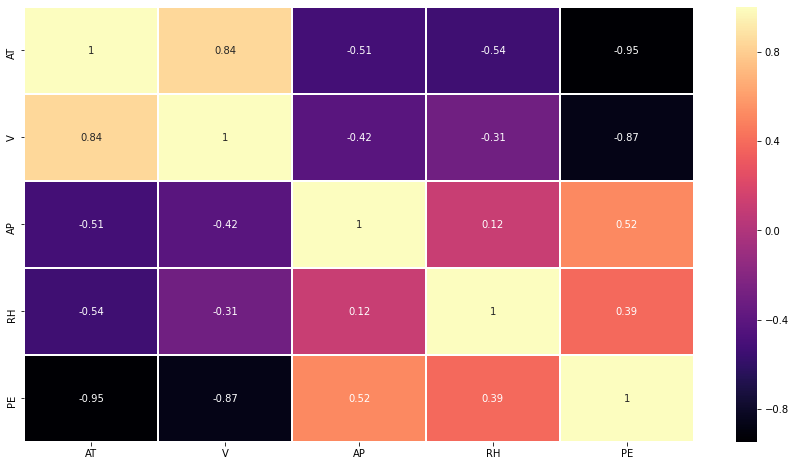

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matpl

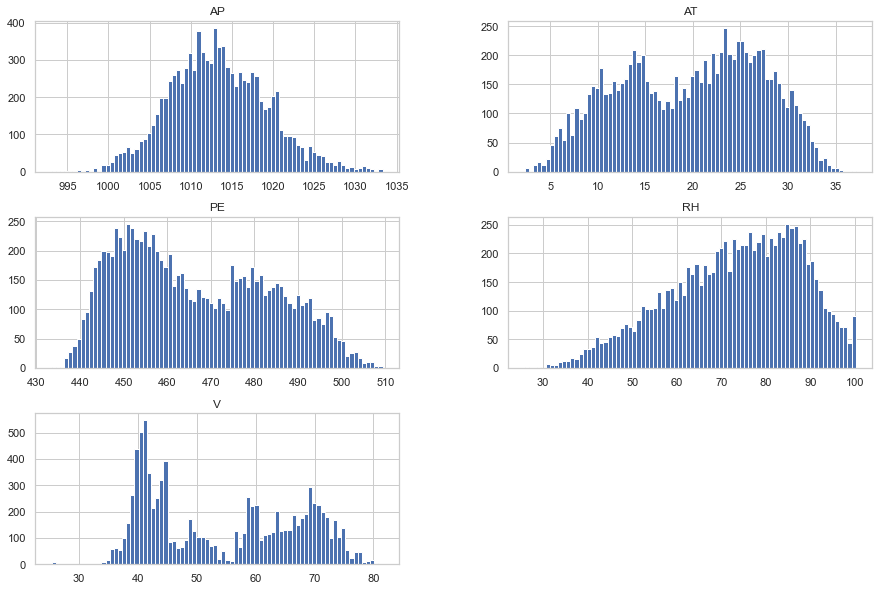

In [104]:
df_train.hist(bins=80,figsize=(15,10))
plt.show()

In [105]:
df_train.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


In [106]:
Upper_limit =481 + 1.5 * (481-452)
Lower_limit = 452 - 1.5 * (481-452)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 524.5
Lower_limit : 408.5


In [107]:
df1 = df_train[df_train['PE']>Upper_limit]
print(df1.shape)
df2 = df_train[df_train['PE']<Lower_limit]
print(df2.shape)

(0, 5)
(0, 5)


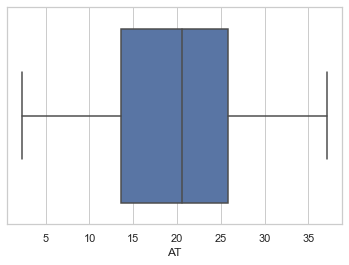

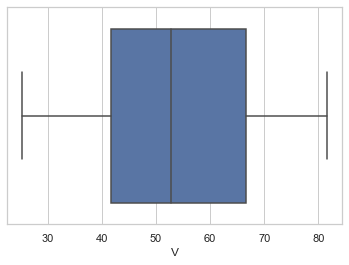

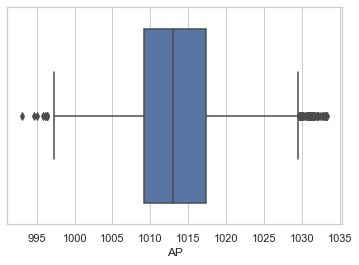

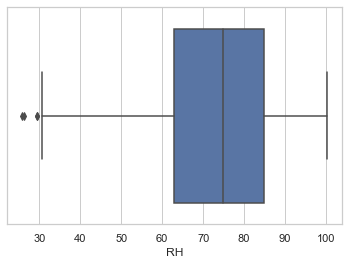

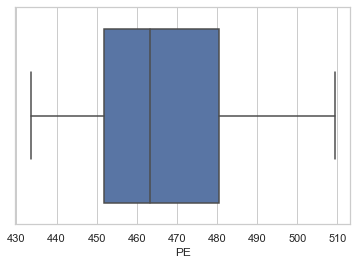

In [108]:
for i in df_train.columns:
    sns.boxplot(df_train[i])
    plt.show()

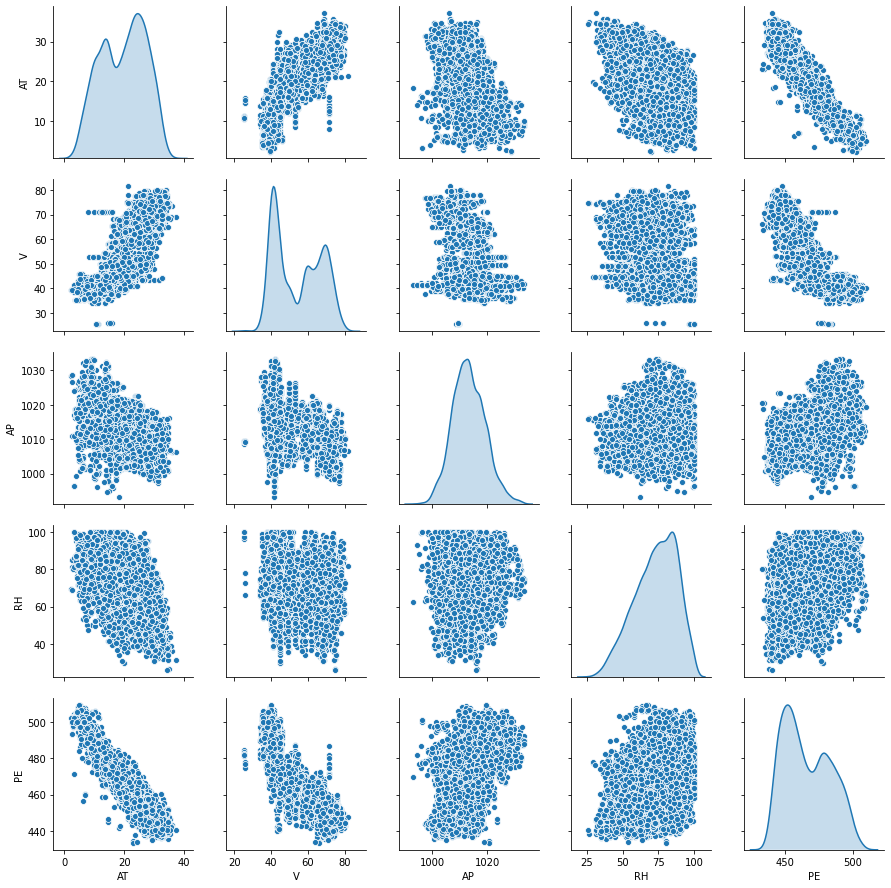

In [32]:
sns.pairplot(df_train,diag_kind='kde')

In [13]:
X = df_train.drop(['PE'],axis=1)
y = df_train['PE']

In [14]:
X

,AT,V,AP,RH
0,29.07,72.51,1009.24,58.38
1,32.38,67.17,1006.97,60.04
2,19.29,67.71,1007.94,63.71
3,16.45,41.48,1016.64,45.21
4,21.43,46.97,1013.94,61.25
...,...,...,...,...
9563,4.44,38.44,1016.14,75.35
9564,18.18,67.71,1004.50,87.26
9565,10.96,45.01,1017.97,95.82
9566,8.70,36.24,1013.34,89.50


In [27]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

C:\Users\niran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.964e+04
Date:                Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:12:01   Log-Likelihood:                -28292.
No. Observations:                9568   AIC:                         5.659e+04
Df Residuals:                    9563   BIC:                         5.663e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        472.5586     10.017     47.174      0.000     452.923     492.195
AT            -1.9853      0.016   -126.580      0.000      -2.016      -1.955
V             -0.2337      0.007    -31.451      0.000      -0.248      -0.219
AP             0.0566      0.010      5.818      0.000       0.038       0.076
RH            -0.1576      0.004    -37.145      0.000      -0.166      -0.149
==============================================================================
Omnibus:                      412.122   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.009
Skew:                          -0.161   Prob(JB):                    3.57e-262
Kurtosis:                       4.708   Cond. No.                     2.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#residual plot
sns.set(style = 'whitegrid')
df1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

C:\Users\niran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        3.571761
1       10.774350
2       -4.530675
3      -13.023431
4        3.055349
          ...    
9563    -0.761267
9564    -2.592435
9565    -1.529150
9566     0.883140
9567     6.768280
Length: 9568, dtype: float64

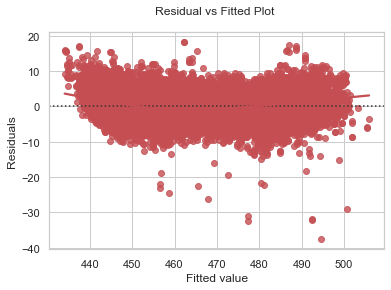

In [113]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'r')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

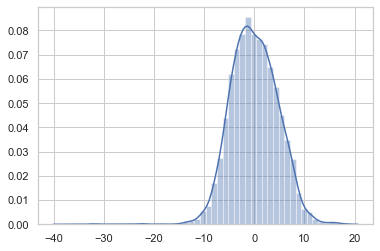

In [114]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [15]:
#lets do Normalization

In [16]:
df_train2 = df_train.copy()

In [17]:
x_tr = df_train2.drop(['PE'], axis=1)
y = df_train2['PE']

In [18]:
norm = MinMaxScaler()

In [19]:
x_tr  = norm.fit_transform(x_tr)

In [20]:
x_tr = pd.DataFrame(x_tr,columns=['AT','V','AP','RH'])

In [21]:
x_tr

,AT,V,AP,RH
0,0.768766,0.838968,0.401344,0.437458
1,0.863963,0.743950,0.344862,0.459809
2,0.487489,0.753559,0.368997,0.509223
3,0.405810,0.286833,0.585469,0.260132
4,0.549037,0.384520,0.518288,0.476101
...,...,...,...,...
9563,0.060397,0.232740,0.573028,0.665949
9564,0.455565,0.753559,0.283404,0.826309
9565,0.247915,0.349644,0.618562,0.941565
9566,0.182916,0.193594,0.503359,0.856470


In [124]:
X = x_tr
y = y
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

C:\Users\niran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.964e+04
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:53:44   Log-Likelihood:                -28292.
No. Observations:                9568   AIC:                         5.659e+04
Df Residuals:                    9563   BIC:                         5.663e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        514.0941      0.441   1166.605      0.000     513.230     514.958
AT           -69.0292      0.545   -126.580      0.000     -70.098     -67.960
V            -13.1344      0.418    -31.451      0.000     -13.953     -12.316
AP             2.2739      0.391      5.818      0.000       1.508       3.040
RH           -11.7041      0.315    -37.145      0.000     -12.322     -11.086
==============================================================================
Omnibus:                      412.122   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.009
Skew:                          -0.161   Prob(JB):                    3.57e-262
Kurtosis:                       4.708   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
sns.set(style = 'whitegrid')
df2['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

C:\Users\niran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        3.571761
1       10.774350
2       -4.530675
3      -13.023431
4        3.055349
          ...    
9563    -0.761267
9564    -2.592435
9565    -1.529150
9566     0.883140
9567     6.768280
Length: 9568, dtype: float64

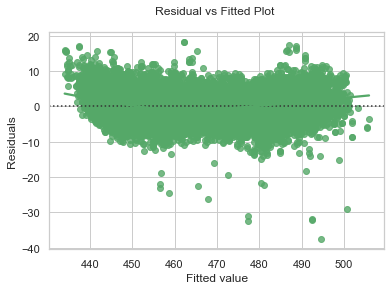

In [126]:
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\niran\Anaconda3\lib\site-packages\pandas\plotting\_matpl

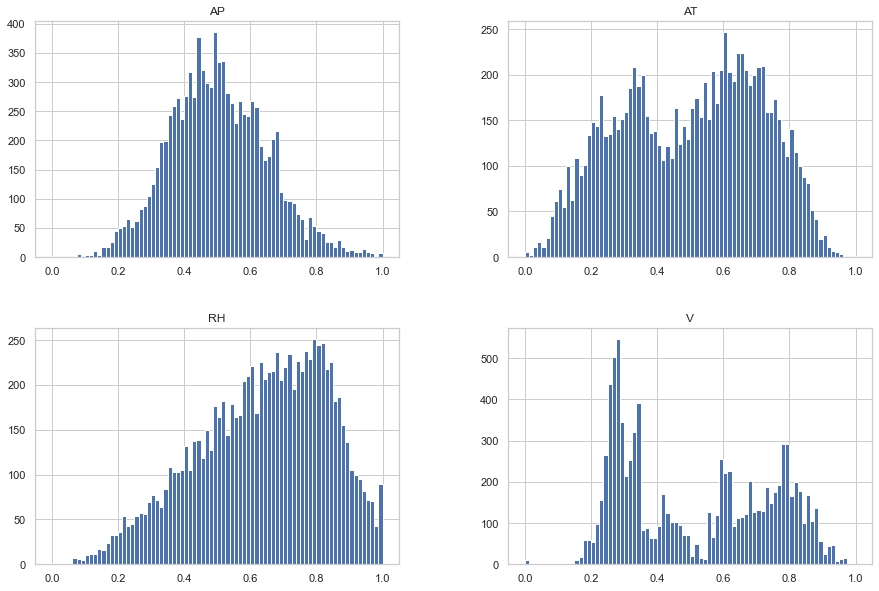

In [127]:
x_tr.hist(bins=80,figsize=(15,10))
plt.show()

In [15]:
#Lets try other models 

In [22]:
X=df_train.drop(['PE'],axis=1)
Y=df_train['PE']

In [23]:
norm = MinMaxScaler()

In [24]:
X = norm.fit_transform(X)

In [25]:
X

array([[0.76876618, 0.83896797, 0.40134362, 0.43745792],
       [0.86396319, 0.74395018, 0.34486191, 0.45980881],
       [0.48748921, 0.75355872, 0.36899726, 0.5092231 ],
       ...,
       [0.24791487, 0.34964413, 0.61856183, 0.94156456],
       [0.18291631, 0.19359431, 0.50335904, 0.85646964],
       [0.73712971, 0.59572954, 0.22741976, 0.43072573]])

In [26]:
X = pd.DataFrame(X,columns=['AT','V','AP','RH'])

In [27]:
X

,AT,V,AP,RH
0,0.768766,0.838968,0.401344,0.437458
1,0.863963,0.743950,0.344862,0.459809
2,0.487489,0.753559,0.368997,0.509223
3,0.405810,0.286833,0.585469,0.260132
4,0.549037,0.384520,0.518288,0.476101
...,...,...,...,...
9563,0.060397,0.232740,0.573028,0.665949
9564,0.455565,0.753559,0.283404,0.826309
9565,0.247915,0.349644,0.618562,0.941565
9566,0.182916,0.193594,0.503359,0.856470


In [28]:
X.shape

(9568, 4)

In [29]:
from sklearn.ensemble import VotingRegressor
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor
from xgboost.sklearn import XGBModel
from xgboost import XGBRegressor
from sklearn.svm import SVC                         
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=11)


In [31]:
#Model 1 XGBOOST

In [32]:
from xgboost import XGBRegressor
model_1 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=20000,
 max_depth=8,
    colsample_bylevel=0.8,
 colsample_bytree=0.8,
 seed=100,
num_parallel_tree=5,
 eval_metric='rmse')
model_1.fit(X_train, y_train, eval_metric='rmse', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[0]	validation_0-rmse:461.68610
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:169.16196
[200]	validation_0-rmse:62.08064
[300]	validation_0-rmse:23.05710
[400]	validation_0-rmse:9.19835
[500]	validation_0-rmse:4.77716
[600]	validation_0-rmse:3.69771
[700]	validation_0-rmse:3.45219
[800]	validation_0-rmse:3.33505
[900]	validation_0-rmse:3.24734
[1000]	validation_0-rmse:3.18484
[1100]	validation_0-rmse:3.13049
[1200]	validation_0-rmse:3.08386
[1300]	validation_0-rmse:3.04504
[1400]	validation_0-rmse:3.01007
[1500]	validation_0-rmse:2.98256
[1600]	validation_0-rmse:2.95658
[1700]	validation_0-rmse:2.93387
[1800]	validation_0-rmse:2.91274
[1900]	validation_0-rmse:2.89158
[2000]	validation_0-rmse:2.87411
[2100]	validation_0-rmse:2.85738
[2200]	validation_0-rmse:2.83965
[2300]	validation_0-rmse:2.82400
[2400]	validation_0-rmse:2.80787
[2500]	validation_0-rmse:2.79476
[2600]	validation_0-rmse:2.78244
[2700]	validation_0-rmse:2.77201
[2800]	validatio

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=20000, n_jobs=0,
             num_parallel_tree=5, objective='reg:squarederror',
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, subsample=1, tree_method=None, validate_parameters=False,
             verbosity=None)

In [34]:
#final xgb fit
from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=10000,
 max_depth=8,
 colsample_bytree=0.8,
    colsample_bylevel=0.8,
    num_parallel_tree=5,
 seed=100)
xgb_model=xgb.fit(X,Y)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=Y,estimator=xgb,scoring='neg_root_mean_squared_error',cv=5)

In [181]:
np.mean(score)

-2.500261375841688

In [39]:
y_pred1 = xgb.predict(df_test)

In [40]:
y_pred1

array([471.26346, 494.85776, 497.24692, ..., 472.03723, 444.4815 ,
       466.4849 ], dtype=float32)

In [ ]:
#LGBM

In [227]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":50, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }

lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.1,
 'lambda_l2': 0.1,
 'learning_rate': 0.01,
 'max_bin': 300,
 'max_depth': 8,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 35}
lgb_params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.1,
 'lambda_l2': 0.1,
 'learning_rate': 0.01,
 'max_bin': 300,
 'max_depth': 8,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 35}

In [228]:
lgb = LGBMRegressor(n_estimators=20000, **lgb_params, random_state=555, n_jobs=-1)
lgb.fit(X_train, y_train, **lgb_fit_params)
lgb.best_iteration_

Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 7.23136
[200]	valid's rmse: 4.45405
[300]	valid's rmse: 3.82509
[400]	valid's rmse: 3.6372
[500]	valid's rmse: 3.535
[600]	valid's rmse: 3.45425
[700]	valid's rmse: 3.38991
[800]	valid's rmse: 3.33641
[900]	valid's rmse: 3.28856
[1000]	valid's rmse: 3.24766
[1100]	valid's rmse: 3.21086
[1200]	valid's rmse: 3.17944
[1300]	valid's rmse: 3.14827
[1400]	valid's rmse: 3.12062
[1500]	valid's rmse: 3.09659
[1600]	valid's rmse: 3.07118
[1700]	valid's rmse: 3.05065
[1800]	valid's rmse: 3.03005
[1900]	valid's rmse: 3.01264
[2000]	valid's rmse: 2.99709
[2100]	valid's rmse: 2.97932
[2200]	valid's rmse: 2.96247
[2300]	valid's rmse: 2.94897
[2400]	valid's rmse: 2.93383
[2500]	valid's rmse: 2.92058
[2600]	valid's rmse: 2.90812
[2700]	valid's rmse: 2.89569
[2800]	valid's rmse: 2.88377
[2900]	valid's rmse: 2.87228
[3000]	valid's rmse: 2.86295
[3100]	valid's rmse: 2.85228
[3200]	valid's rmse: 2.84232
[3300]	valid's rmse: 2.

9847

In [229]:
#fitiing best model
lgb=LGBMRegressor(n_estimators=10000 , **lgb_params)
lgb_model=lgb.fit(X, Y)

In [230]:
score2=cross_val_score(X=X,y=Y,estimator=lgb,scoring='neg_root_mean_squared_error',cv=5)

In [231]:
np.mean(score2)

-2.522107913731371

In [58]:
y_pred2 = lgb_model.predict(df_test)

In [59]:
y_pred2

array([471.1180669 , 494.97690055, 495.3695999 , ..., 471.35269476,
       445.56184484, 463.74273794])

In [54]:
#3 CAT boost
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(
        iterations=10000,logging_level="Silent",early_stopping_rounds=1000,loss_function='Poisson',
    use_best_model=True,leaf_estimation_method='Gradient',
        eval_metric="RMSE")
cbr.fit(X_train,y_train,
        eval_set=(X_test,y_test),
        plot=True 
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [51]:
score3=cross_val_score(X=X,y=Y,estimator=cbr,scoring='neg_root_mean_squared_error',cv=5)

Learning rate set to 0.05607
0:	learn: 16.2286839	total: 3.15ms	remaining: 3.14s
1:	learn: 15.4500207	total: 5.64ms	remaining: 2.81s
2:	learn: 14.7027895	total: 7.98ms	remaining: 2.65s
3:	learn: 13.9934481	total: 10.3ms	remaining: 2.56s
4:	learn: 13.3449980	total: 12.5ms	remaining: 2.49s
5:	learn: 12.7068344	total: 14.6ms	remaining: 2.42s
6:	learn: 12.1294755	total: 16.6ms	remaining: 2.36s
7:	learn: 11.5728301	total: 18.8ms	remaining: 2.33s
8:	learn: 11.0559419	total: 20.9ms	remaining: 2.3s
9:	learn: 10.5669012	total: 23ms	remaining: 2.28s
10:	learn: 10.0995081	total: 25.1ms	remaining: 2.26s
11:	learn: 9.6747042	total: 27.3ms	remaining: 2.25s
12:	learn: 9.2730467	total: 29.6ms	remaining: 2.25s
13:	learn: 8.9014123	total: 31.7ms	remaining: 2.23s
14:	learn: 8.5546325	total: 34ms	remaining: 2.23s
15:	learn: 8.2206654	total: 36.3ms	remaining: 2.23s
16:	learn: 7.9229937	total: 38.6ms	remaining: 2.23s
17:	learn: 7.6410296	total: 40.9ms	remaining: 2.23s
18:	learn: 7.3731748	total: 43.1ms	rema

229:	learn: 3.6194891	total: 495ms	remaining: 1.66s
230:	learn: 3.6167760	total: 498ms	remaining: 1.66s
231:	learn: 3.6135587	total: 500ms	remaining: 1.65s
232:	learn: 3.6118411	total: 502ms	remaining: 1.65s
233:	learn: 3.6105717	total: 504ms	remaining: 1.65s
234:	learn: 3.6086178	total: 507ms	remaining: 1.65s
235:	learn: 3.6077403	total: 511ms	remaining: 1.65s
236:	learn: 3.6058393	total: 513ms	remaining: 1.65s
237:	learn: 3.6030208	total: 515ms	remaining: 1.65s
238:	learn: 3.6005698	total: 518ms	remaining: 1.65s
239:	learn: 3.5985271	total: 520ms	remaining: 1.65s
240:	learn: 3.5950846	total: 522ms	remaining: 1.64s
241:	learn: 3.5921870	total: 524ms	remaining: 1.64s
242:	learn: 3.5896927	total: 527ms	remaining: 1.64s
243:	learn: 3.5872776	total: 529ms	remaining: 1.64s
244:	learn: 3.5849390	total: 531ms	remaining: 1.64s
245:	learn: 3.5831889	total: 533ms	remaining: 1.63s
246:	learn: 3.5813453	total: 535ms	remaining: 1.63s
247:	learn: 3.5798516	total: 537ms	remaining: 1.63s
248:	learn: 

441:	learn: 3.2122742	total: 981ms	remaining: 1.24s
442:	learn: 3.2102295	total: 983ms	remaining: 1.24s
443:	learn: 3.2094877	total: 985ms	remaining: 1.23s
444:	learn: 3.2079570	total: 987ms	remaining: 1.23s
445:	learn: 3.2066910	total: 989ms	remaining: 1.23s
446:	learn: 3.2052956	total: 991ms	remaining: 1.23s
447:	learn: 3.2037415	total: 993ms	remaining: 1.22s
448:	learn: 3.2021286	total: 995ms	remaining: 1.22s
449:	learn: 3.2002894	total: 997ms	remaining: 1.22s
450:	learn: 3.1978649	total: 999ms	remaining: 1.22s
451:	learn: 3.1960630	total: 1s	remaining: 1.21s
452:	learn: 3.1951333	total: 1s	remaining: 1.21s
453:	learn: 3.1935314	total: 1s	remaining: 1.21s
454:	learn: 3.1910960	total: 1.01s	remaining: 1.21s
455:	learn: 3.1893830	total: 1.01s	remaining: 1.2s
456:	learn: 3.1880955	total: 1.01s	remaining: 1.2s
457:	learn: 3.1873672	total: 1.01s	remaining: 1.2s
458:	learn: 3.1865236	total: 1.01s	remaining: 1.2s
459:	learn: 3.1847756	total: 1.02s	remaining: 1.19s
460:	learn: 3.1836276	tot

619:	learn: 2.9831562	total: 1.32s	remaining: 812ms
620:	learn: 2.9817118	total: 1.33s	remaining: 810ms
621:	learn: 2.9806721	total: 1.33s	remaining: 808ms
622:	learn: 2.9798777	total: 1.33s	remaining: 806ms
623:	learn: 2.9782910	total: 1.33s	remaining: 804ms
624:	learn: 2.9774516	total: 1.34s	remaining: 802ms
625:	learn: 2.9764797	total: 1.34s	remaining: 800ms
626:	learn: 2.9751954	total: 1.34s	remaining: 798ms
627:	learn: 2.9735986	total: 1.34s	remaining: 795ms
628:	learn: 2.9729555	total: 1.34s	remaining: 793ms
629:	learn: 2.9713877	total: 1.35s	remaining: 791ms
630:	learn: 2.9697403	total: 1.35s	remaining: 789ms
631:	learn: 2.9682228	total: 1.35s	remaining: 787ms
632:	learn: 2.9676077	total: 1.35s	remaining: 784ms
633:	learn: 2.9660076	total: 1.35s	remaining: 783ms
634:	learn: 2.9652302	total: 1.36s	remaining: 780ms
635:	learn: 2.9637914	total: 1.36s	remaining: 778ms
636:	learn: 2.9631043	total: 1.36s	remaining: 776ms
637:	learn: 2.9616944	total: 1.36s	remaining: 773ms
638:	learn: 

856:	learn: 2.7503703	total: 1.83s	remaining: 306ms
857:	learn: 2.7496617	total: 1.83s	remaining: 304ms
858:	learn: 2.7489416	total: 1.84s	remaining: 302ms
859:	learn: 2.7481091	total: 1.84s	remaining: 299ms
860:	learn: 2.7472299	total: 1.84s	remaining: 297ms
861:	learn: 2.7458591	total: 1.84s	remaining: 295ms
862:	learn: 2.7450305	total: 1.84s	remaining: 293ms
863:	learn: 2.7441673	total: 1.85s	remaining: 291ms
864:	learn: 2.7433962	total: 1.85s	remaining: 289ms
865:	learn: 2.7426698	total: 1.85s	remaining: 287ms
866:	learn: 2.7413626	total: 1.85s	remaining: 284ms
867:	learn: 2.7402431	total: 1.86s	remaining: 282ms
868:	learn: 2.7397537	total: 1.86s	remaining: 280ms
869:	learn: 2.7385706	total: 1.86s	remaining: 278ms
870:	learn: 2.7378892	total: 1.86s	remaining: 276ms
871:	learn: 2.7372437	total: 1.86s	remaining: 274ms
872:	learn: 2.7367203	total: 1.87s	remaining: 272ms
873:	learn: 2.7358379	total: 1.87s	remaining: 269ms
874:	learn: 2.7348388	total: 1.87s	remaining: 267ms
875:	learn: 

93:	learn: 3.9913486	total: 186ms	remaining: 1.8s
94:	learn: 3.9876775	total: 188ms	remaining: 1.79s
95:	learn: 3.9826800	total: 190ms	remaining: 1.79s
96:	learn: 3.9785374	total: 192ms	remaining: 1.79s
97:	learn: 3.9753927	total: 194ms	remaining: 1.79s
98:	learn: 3.9718232	total: 196ms	remaining: 1.78s
99:	learn: 3.9676713	total: 198ms	remaining: 1.78s
100:	learn: 3.9641119	total: 200ms	remaining: 1.78s
101:	learn: 3.9599962	total: 202ms	remaining: 1.78s
102:	learn: 3.9570936	total: 204ms	remaining: 1.78s
103:	learn: 3.9533459	total: 206ms	remaining: 1.78s
104:	learn: 3.9509445	total: 208ms	remaining: 1.78s
105:	learn: 3.9472403	total: 210ms	remaining: 1.77s
106:	learn: 3.9434597	total: 212ms	remaining: 1.77s
107:	learn: 3.9406566	total: 215ms	remaining: 1.78s
108:	learn: 3.9367630	total: 217ms	remaining: 1.78s
109:	learn: 3.9340068	total: 219ms	remaining: 1.77s
110:	learn: 3.9306766	total: 221ms	remaining: 1.77s
111:	learn: 3.9266981	total: 223ms	remaining: 1.77s
112:	learn: 3.922777

255:	learn: 3.5387355	total: 523ms	remaining: 1.52s
256:	learn: 3.5369033	total: 525ms	remaining: 1.52s
257:	learn: 3.5354139	total: 527ms	remaining: 1.52s
258:	learn: 3.5330565	total: 529ms	remaining: 1.51s
259:	learn: 3.5300337	total: 531ms	remaining: 1.51s
260:	learn: 3.5276032	total: 533ms	remaining: 1.51s
261:	learn: 3.5262563	total: 535ms	remaining: 1.51s
262:	learn: 3.5248143	total: 537ms	remaining: 1.5s
263:	learn: 3.5233737	total: 540ms	remaining: 1.5s
264:	learn: 3.5218188	total: 542ms	remaining: 1.5s
265:	learn: 3.5204116	total: 544ms	remaining: 1.5s
266:	learn: 3.5190970	total: 546ms	remaining: 1.5s
267:	learn: 3.5176228	total: 548ms	remaining: 1.5s
268:	learn: 3.5163115	total: 551ms	remaining: 1.5s
269:	learn: 3.5136919	total: 553ms	remaining: 1.5s
270:	learn: 3.5113757	total: 555ms	remaining: 1.49s
271:	learn: 3.5101099	total: 557ms	remaining: 1.49s
272:	learn: 3.5071425	total: 559ms	remaining: 1.49s
273:	learn: 3.5043206	total: 561ms	remaining: 1.49s
274:	learn: 3.502820

426:	learn: 3.2227388	total: 864ms	remaining: 1.16s
427:	learn: 3.2216039	total: 866ms	remaining: 1.16s
428:	learn: 3.2204442	total: 868ms	remaining: 1.16s
429:	learn: 3.2184184	total: 870ms	remaining: 1.15s
430:	learn: 3.2174866	total: 876ms	remaining: 1.16s
431:	learn: 3.2160942	total: 879ms	remaining: 1.16s
432:	learn: 3.2137034	total: 881ms	remaining: 1.15s
433:	learn: 3.2123376	total: 883ms	remaining: 1.15s
434:	learn: 3.2110238	total: 885ms	remaining: 1.15s
435:	learn: 3.2085826	total: 888ms	remaining: 1.15s
436:	learn: 3.2076731	total: 890ms	remaining: 1.15s
437:	learn: 3.2058060	total: 892ms	remaining: 1.14s
438:	learn: 3.2035744	total: 894ms	remaining: 1.14s
439:	learn: 3.2024024	total: 896ms	remaining: 1.14s
440:	learn: 3.2014024	total: 898ms	remaining: 1.14s
441:	learn: 3.1998555	total: 900ms	remaining: 1.14s
442:	learn: 3.1980629	total: 902ms	remaining: 1.13s
443:	learn: 3.1971869	total: 904ms	remaining: 1.13s
444:	learn: 3.1958853	total: 906ms	remaining: 1.13s
445:	learn: 

596:	learn: 3.0110036	total: 1.21s	remaining: 814ms
597:	learn: 3.0092518	total: 1.21s	remaining: 812ms
598:	learn: 3.0084556	total: 1.21s	remaining: 810ms
599:	learn: 3.0070453	total: 1.21s	remaining: 808ms
600:	learn: 3.0061473	total: 1.21s	remaining: 806ms
601:	learn: 3.0044943	total: 1.22s	remaining: 804ms
602:	learn: 3.0038561	total: 1.22s	remaining: 802ms
603:	learn: 3.0029283	total: 1.22s	remaining: 800ms
604:	learn: 3.0018731	total: 1.22s	remaining: 798ms
605:	learn: 3.0009007	total: 1.22s	remaining: 796ms
606:	learn: 2.9991140	total: 1.23s	remaining: 794ms
607:	learn: 2.9980002	total: 1.23s	remaining: 792ms
608:	learn: 2.9964832	total: 1.23s	remaining: 790ms
609:	learn: 2.9953093	total: 1.23s	remaining: 788ms
610:	learn: 2.9939514	total: 1.24s	remaining: 787ms
611:	learn: 2.9929593	total: 1.24s	remaining: 785ms
612:	learn: 2.9923919	total: 1.24s	remaining: 783ms
613:	learn: 2.9915145	total: 1.24s	remaining: 781ms
614:	learn: 2.9905598	total: 1.24s	remaining: 779ms
615:	learn: 

758:	learn: 2.8302267	total: 1.55s	remaining: 491ms
759:	learn: 2.8294001	total: 1.55s	remaining: 489ms
760:	learn: 2.8283778	total: 1.55s	remaining: 487ms
761:	learn: 2.8276746	total: 1.55s	remaining: 485ms
762:	learn: 2.8267456	total: 1.55s	remaining: 483ms
763:	learn: 2.8255724	total: 1.56s	remaining: 481ms
764:	learn: 2.8247616	total: 1.56s	remaining: 479ms
765:	learn: 2.8240817	total: 1.56s	remaining: 477ms
766:	learn: 2.8230430	total: 1.56s	remaining: 475ms
767:	learn: 2.8223547	total: 1.57s	remaining: 473ms
768:	learn: 2.8215235	total: 1.57s	remaining: 471ms
769:	learn: 2.8209765	total: 1.57s	remaining: 469ms
770:	learn: 2.8203190	total: 1.57s	remaining: 467ms
771:	learn: 2.8197658	total: 1.57s	remaining: 465ms
772:	learn: 2.8193646	total: 1.58s	remaining: 463ms
773:	learn: 2.8187008	total: 1.58s	remaining: 461ms
774:	learn: 2.8179254	total: 1.58s	remaining: 459ms
775:	learn: 2.8169140	total: 1.58s	remaining: 457ms
776:	learn: 2.8163424	total: 1.58s	remaining: 455ms
777:	learn: 

921:	learn: 2.6917201	total: 1.89s	remaining: 160ms
922:	learn: 2.6913097	total: 1.89s	remaining: 158ms
923:	learn: 2.6903692	total: 1.89s	remaining: 156ms
924:	learn: 2.6895047	total: 1.89s	remaining: 154ms
925:	learn: 2.6886841	total: 1.9s	remaining: 152ms
926:	learn: 2.6872578	total: 1.9s	remaining: 150ms
927:	learn: 2.6868446	total: 1.9s	remaining: 147ms
928:	learn: 2.6859594	total: 1.9s	remaining: 145ms
929:	learn: 2.6852576	total: 1.91s	remaining: 143ms
930:	learn: 2.6844997	total: 1.91s	remaining: 141ms
931:	learn: 2.6841005	total: 1.91s	remaining: 139ms
932:	learn: 2.6833138	total: 1.91s	remaining: 137ms
933:	learn: 2.6824145	total: 1.91s	remaining: 135ms
934:	learn: 2.6820590	total: 1.92s	remaining: 133ms
935:	learn: 2.6810285	total: 1.92s	remaining: 131ms
936:	learn: 2.6799545	total: 1.92s	remaining: 129ms
937:	learn: 2.6792419	total: 1.92s	remaining: 127ms
938:	learn: 2.6787302	total: 1.92s	remaining: 125ms
939:	learn: 2.6778062	total: 1.93s	remaining: 123ms
940:	learn: 2.67

147:	learn: 3.8505410	total: 322ms	remaining: 1.85s
148:	learn: 3.8478994	total: 324ms	remaining: 1.85s
149:	learn: 3.8446818	total: 326ms	remaining: 1.85s
150:	learn: 3.8421919	total: 328ms	remaining: 1.84s
151:	learn: 3.8388872	total: 330ms	remaining: 1.84s
152:	learn: 3.8354503	total: 332ms	remaining: 1.84s
153:	learn: 3.8327520	total: 334ms	remaining: 1.83s
154:	learn: 3.8293503	total: 336ms	remaining: 1.83s
155:	learn: 3.8269827	total: 339ms	remaining: 1.83s
156:	learn: 3.8250493	total: 341ms	remaining: 1.83s
157:	learn: 3.8223083	total: 343ms	remaining: 1.83s
158:	learn: 3.8189832	total: 345ms	remaining: 1.83s
159:	learn: 3.8173470	total: 347ms	remaining: 1.82s
160:	learn: 3.8123559	total: 349ms	remaining: 1.82s
161:	learn: 3.8094145	total: 351ms	remaining: 1.82s
162:	learn: 3.8060071	total: 353ms	remaining: 1.81s
163:	learn: 3.8027084	total: 356ms	remaining: 1.81s
164:	learn: 3.8012169	total: 358ms	remaining: 1.81s
165:	learn: 3.7996983	total: 359ms	remaining: 1.8s
166:	learn: 3

305:	learn: 3.4385001	total: 658ms	remaining: 1.49s
306:	learn: 3.4350789	total: 661ms	remaining: 1.49s
307:	learn: 3.4332451	total: 663ms	remaining: 1.49s
308:	learn: 3.4310289	total: 665ms	remaining: 1.49s
309:	learn: 3.4297672	total: 667ms	remaining: 1.49s
310:	learn: 3.4276675	total: 670ms	remaining: 1.48s
311:	learn: 3.4251357	total: 672ms	remaining: 1.48s
312:	learn: 3.4226484	total: 674ms	remaining: 1.48s
313:	learn: 3.4212574	total: 676ms	remaining: 1.48s
314:	learn: 3.4187909	total: 678ms	remaining: 1.47s
315:	learn: 3.4172530	total: 680ms	remaining: 1.47s
316:	learn: 3.4156825	total: 682ms	remaining: 1.47s
317:	learn: 3.4143875	total: 684ms	remaining: 1.47s
318:	learn: 3.4125166	total: 686ms	remaining: 1.46s
319:	learn: 3.4108325	total: 688ms	remaining: 1.46s
320:	learn: 3.4084989	total: 691ms	remaining: 1.46s
321:	learn: 3.4063924	total: 693ms	remaining: 1.46s
322:	learn: 3.4046384	total: 695ms	remaining: 1.46s
323:	learn: 3.4033643	total: 697ms	remaining: 1.45s
324:	learn: 

464:	learn: 3.1737812	total: 994ms	remaining: 1.14s
465:	learn: 3.1719031	total: 996ms	remaining: 1.14s
466:	learn: 3.1712464	total: 998ms	remaining: 1.14s
467:	learn: 3.1695364	total: 1000ms	remaining: 1.14s
468:	learn: 3.1677217	total: 1s	remaining: 1.13s
469:	learn: 3.1656336	total: 1s	remaining: 1.13s
470:	learn: 3.1636739	total: 1.01s	remaining: 1.13s
471:	learn: 3.1621378	total: 1.01s	remaining: 1.13s
472:	learn: 3.1611382	total: 1.01s	remaining: 1.13s
473:	learn: 3.1600232	total: 1.01s	remaining: 1.13s
474:	learn: 3.1579306	total: 1.02s	remaining: 1.13s
475:	learn: 3.1568402	total: 1.02s	remaining: 1.12s
476:	learn: 3.1547242	total: 1.02s	remaining: 1.12s
477:	learn: 3.1526015	total: 1.02s	remaining: 1.12s
478:	learn: 3.1510153	total: 1.03s	remaining: 1.12s
479:	learn: 3.1487537	total: 1.03s	remaining: 1.11s
480:	learn: 3.1473194	total: 1.03s	remaining: 1.11s
481:	learn: 3.1459090	total: 1.03s	remaining: 1.11s
482:	learn: 3.1447380	total: 1.04s	remaining: 1.11s
483:	learn: 3.144

663:	learn: 2.9363570	total: 1.48s	remaining: 750ms
664:	learn: 2.9352923	total: 1.48s	remaining: 747ms
665:	learn: 2.9341065	total: 1.49s	remaining: 745ms
666:	learn: 2.9331582	total: 1.49s	remaining: 743ms
667:	learn: 2.9321806	total: 1.49s	remaining: 741ms
668:	learn: 2.9314279	total: 1.49s	remaining: 739ms
669:	learn: 2.9299735	total: 1.5s	remaining: 736ms
670:	learn: 2.9291572	total: 1.5s	remaining: 737ms
671:	learn: 2.9277359	total: 1.51s	remaining: 735ms
672:	learn: 2.9255043	total: 1.51s	remaining: 733ms
673:	learn: 2.9242882	total: 1.51s	remaining: 731ms
674:	learn: 2.9234314	total: 1.51s	remaining: 728ms
675:	learn: 2.9228562	total: 1.52s	remaining: 727ms
676:	learn: 2.9219047	total: 1.52s	remaining: 725ms
677:	learn: 2.9207602	total: 1.52s	remaining: 723ms
678:	learn: 2.9197539	total: 1.52s	remaining: 720ms
679:	learn: 2.9188351	total: 1.52s	remaining: 718ms
680:	learn: 2.9181568	total: 1.53s	remaining: 716ms
681:	learn: 2.9170736	total: 1.53s	remaining: 713ms
682:	learn: 2.

892:	learn: 2.7092865	total: 1.98s	remaining: 238ms
893:	learn: 2.7083134	total: 1.99s	remaining: 236ms
894:	learn: 2.7073634	total: 1.99s	remaining: 233ms
895:	learn: 2.7068835	total: 1.99s	remaining: 231ms
896:	learn: 2.7061077	total: 1.99s	remaining: 229ms
897:	learn: 2.7056838	total: 1.99s	remaining: 227ms
898:	learn: 2.7053769	total: 2s	remaining: 224ms
899:	learn: 2.7042296	total: 2s	remaining: 222ms
900:	learn: 2.7030016	total: 2s	remaining: 220ms
901:	learn: 2.7019810	total: 2s	remaining: 218ms
902:	learn: 2.7011458	total: 2s	remaining: 215ms
903:	learn: 2.7001226	total: 2.01s	remaining: 213ms
904:	learn: 2.6993516	total: 2.01s	remaining: 211ms
905:	learn: 2.6985635	total: 2.01s	remaining: 209ms
906:	learn: 2.6975575	total: 2.01s	remaining: 207ms
907:	learn: 2.6968843	total: 2.02s	remaining: 204ms
908:	learn: 2.6961723	total: 2.02s	remaining: 202ms
909:	learn: 2.6956139	total: 2.02s	remaining: 200ms
910:	learn: 2.6944089	total: 2.02s	remaining: 198ms
911:	learn: 2.6935101	total

119:	learn: 3.9179282	total: 241ms	remaining: 1.76s
120:	learn: 3.9141935	total: 243ms	remaining: 1.76s
121:	learn: 3.9121586	total: 245ms	remaining: 1.76s
122:	learn: 3.9099515	total: 247ms	remaining: 1.76s
123:	learn: 3.9070024	total: 249ms	remaining: 1.76s
124:	learn: 3.9042338	total: 251ms	remaining: 1.76s
125:	learn: 3.9005463	total: 254ms	remaining: 1.76s
126:	learn: 3.8983897	total: 256ms	remaining: 1.76s
127:	learn: 3.8947094	total: 258ms	remaining: 1.76s
128:	learn: 3.8933187	total: 260ms	remaining: 1.76s
129:	learn: 3.8886848	total: 263ms	remaining: 1.76s
130:	learn: 3.8874485	total: 265ms	remaining: 1.76s
131:	learn: 3.8830835	total: 267ms	remaining: 1.75s
132:	learn: 3.8812038	total: 269ms	remaining: 1.75s
133:	learn: 3.8777641	total: 272ms	remaining: 1.76s
134:	learn: 3.8751071	total: 274ms	remaining: 1.75s
135:	learn: 3.8723274	total: 276ms	remaining: 1.75s
136:	learn: 3.8686246	total: 278ms	remaining: 1.75s
137:	learn: 3.8670024	total: 280ms	remaining: 1.75s
138:	learn: 

285:	learn: 3.4907590	total: 584ms	remaining: 1.46s
286:	learn: 3.4888704	total: 586ms	remaining: 1.46s
287:	learn: 3.4873976	total: 588ms	remaining: 1.45s
288:	learn: 3.4847481	total: 591ms	remaining: 1.45s
289:	learn: 3.4824038	total: 593ms	remaining: 1.45s
290:	learn: 3.4801670	total: 595ms	remaining: 1.45s
291:	learn: 3.4780144	total: 597ms	remaining: 1.45s
292:	learn: 3.4769259	total: 600ms	remaining: 1.45s
293:	learn: 3.4757283	total: 602ms	remaining: 1.45s
294:	learn: 3.4736998	total: 604ms	remaining: 1.44s
295:	learn: 3.4715101	total: 607ms	remaining: 1.44s
296:	learn: 3.4682948	total: 609ms	remaining: 1.44s
297:	learn: 3.4668194	total: 611ms	remaining: 1.44s
298:	learn: 3.4645206	total: 613ms	remaining: 1.44s
299:	learn: 3.4616158	total: 615ms	remaining: 1.43s
300:	learn: 3.4599583	total: 617ms	remaining: 1.43s
301:	learn: 3.4572047	total: 619ms	remaining: 1.43s
302:	learn: 3.4546575	total: 621ms	remaining: 1.43s
303:	learn: 3.4523354	total: 623ms	remaining: 1.43s
304:	learn: 

445:	learn: 3.2288149	total: 923ms	remaining: 1.15s
446:	learn: 3.2274395	total: 926ms	remaining: 1.15s
447:	learn: 3.2264901	total: 928ms	remaining: 1.14s
448:	learn: 3.2248456	total: 930ms	remaining: 1.14s
449:	learn: 3.2240058	total: 932ms	remaining: 1.14s
450:	learn: 3.2225978	total: 935ms	remaining: 1.14s
451:	learn: 3.2207709	total: 937ms	remaining: 1.14s
452:	learn: 3.2193215	total: 940ms	remaining: 1.13s
453:	learn: 3.2177359	total: 942ms	remaining: 1.13s
454:	learn: 3.2161155	total: 944ms	remaining: 1.13s
455:	learn: 3.2146450	total: 946ms	remaining: 1.13s
456:	learn: 3.2126258	total: 949ms	remaining: 1.13s
457:	learn: 3.2111410	total: 951ms	remaining: 1.12s
458:	learn: 3.2102976	total: 953ms	remaining: 1.12s
459:	learn: 3.2083580	total: 955ms	remaining: 1.12s
460:	learn: 3.2073213	total: 957ms	remaining: 1.12s
461:	learn: 3.2067040	total: 959ms	remaining: 1.12s
462:	learn: 3.2053538	total: 961ms	remaining: 1.11s
463:	learn: 3.2041410	total: 963ms	remaining: 1.11s
464:	learn: 

609:	learn: 3.0284288	total: 1.26s	remaining: 809ms
610:	learn: 3.0271503	total: 1.27s	remaining: 807ms
611:	learn: 3.0263521	total: 1.27s	remaining: 805ms
612:	learn: 3.0256840	total: 1.27s	remaining: 803ms
613:	learn: 3.0242319	total: 1.27s	remaining: 801ms
614:	learn: 3.0236777	total: 1.28s	remaining: 799ms
615:	learn: 3.0227794	total: 1.28s	remaining: 797ms
616:	learn: 3.0210352	total: 1.28s	remaining: 796ms
617:	learn: 3.0202113	total: 1.28s	remaining: 794ms
618:	learn: 3.0187772	total: 1.29s	remaining: 792ms
619:	learn: 3.0180062	total: 1.29s	remaining: 790ms
620:	learn: 3.0166832	total: 1.29s	remaining: 788ms
621:	learn: 3.0155052	total: 1.29s	remaining: 786ms
622:	learn: 3.0144903	total: 1.29s	remaining: 784ms
623:	learn: 3.0129586	total: 1.3s	remaining: 781ms
624:	learn: 3.0121548	total: 1.3s	remaining: 779ms
625:	learn: 3.0109857	total: 1.3s	remaining: 777ms
626:	learn: 3.0099283	total: 1.3s	remaining: 775ms
627:	learn: 3.0087452	total: 1.3s	remaining: 773ms
628:	learn: 3.008

775:	learn: 2.8579313	total: 1.61s	remaining: 465ms
776:	learn: 2.8569703	total: 1.61s	remaining: 463ms
777:	learn: 2.8563394	total: 1.61s	remaining: 460ms
778:	learn: 2.8555260	total: 1.61s	remaining: 458ms
779:	learn: 2.8545795	total: 1.62s	remaining: 456ms
780:	learn: 2.8537458	total: 1.62s	remaining: 454ms
781:	learn: 2.8526545	total: 1.63s	remaining: 453ms
782:	learn: 2.8514216	total: 1.63s	remaining: 451ms
783:	learn: 2.8509144	total: 1.63s	remaining: 449ms
784:	learn: 2.8501115	total: 1.63s	remaining: 447ms
785:	learn: 2.8491395	total: 1.63s	remaining: 445ms
786:	learn: 2.8479105	total: 1.64s	remaining: 443ms
787:	learn: 2.8472036	total: 1.64s	remaining: 441ms
788:	learn: 2.8463932	total: 1.64s	remaining: 439ms
789:	learn: 2.8455704	total: 1.64s	remaining: 437ms
790:	learn: 2.8448917	total: 1.65s	remaining: 435ms
791:	learn: 2.8439970	total: 1.65s	remaining: 433ms
792:	learn: 2.8432439	total: 1.65s	remaining: 431ms
793:	learn: 2.8423025	total: 1.65s	remaining: 428ms
794:	learn: 

0:	learn: 16.2318579	total: 3.63ms	remaining: 3.62s
1:	learn: 15.4476265	total: 5.56ms	remaining: 2.77s
2:	learn: 14.6918428	total: 7.48ms	remaining: 2.48s
3:	learn: 13.9846029	total: 9.58ms	remaining: 2.39s
4:	learn: 13.3272696	total: 11.6ms	remaining: 2.31s
5:	learn: 12.6886162	total: 13.6ms	remaining: 2.25s
6:	learn: 12.0941731	total: 15.8ms	remaining: 2.25s
7:	learn: 11.5399212	total: 17.9ms	remaining: 2.21s
8:	learn: 11.0231217	total: 19.8ms	remaining: 2.18s
9:	learn: 10.5353424	total: 21.8ms	remaining: 2.16s
10:	learn: 10.0656370	total: 23.7ms	remaining: 2.13s
11:	learn: 9.6438642	total: 25.8ms	remaining: 2.12s
12:	learn: 9.2506368	total: 27.8ms	remaining: 2.11s
13:	learn: 8.8791970	total: 29.8ms	remaining: 2.1s
14:	learn: 8.5247005	total: 32ms	remaining: 2.1s
15:	learn: 8.1991567	total: 34ms	remaining: 2.09s
16:	learn: 7.8906316	total: 36.1ms	remaining: 2.08s
17:	learn: 7.6079621	total: 38ms	remaining: 2.07s
18:	learn: 7.3373332	total: 40ms	remaining: 2.06s
19:	learn: 7.0888839	

166:	learn: 3.7792443	total: 341ms	remaining: 1.7s
167:	learn: 3.7760016	total: 344ms	remaining: 1.7s
168:	learn: 3.7736163	total: 346ms	remaining: 1.7s
169:	learn: 3.7703200	total: 348ms	remaining: 1.7s
170:	learn: 3.7675431	total: 350ms	remaining: 1.7s
171:	learn: 3.7661852	total: 352ms	remaining: 1.69s
172:	learn: 3.7633151	total: 354ms	remaining: 1.69s
173:	learn: 3.7614417	total: 357ms	remaining: 1.69s
174:	learn: 3.7592908	total: 359ms	remaining: 1.69s
175:	learn: 3.7578216	total: 361ms	remaining: 1.69s
176:	learn: 3.7547775	total: 363ms	remaining: 1.69s
177:	learn: 3.7515066	total: 365ms	remaining: 1.69s
178:	learn: 3.7494580	total: 367ms	remaining: 1.68s
179:	learn: 3.7477273	total: 369ms	remaining: 1.68s
180:	learn: 3.7459994	total: 371ms	remaining: 1.68s
181:	learn: 3.7423624	total: 373ms	remaining: 1.68s
182:	learn: 3.7387683	total: 375ms	remaining: 1.67s
183:	learn: 3.7361049	total: 377ms	remaining: 1.67s
184:	learn: 3.7329532	total: 379ms	remaining: 1.67s
185:	learn: 3.730

333:	learn: 3.4039909	total: 685ms	remaining: 1.37s
334:	learn: 3.4017630	total: 688ms	remaining: 1.36s
335:	learn: 3.4002571	total: 690ms	remaining: 1.36s
336:	learn: 3.3983721	total: 692ms	remaining: 1.36s
337:	learn: 3.3956797	total: 697ms	remaining: 1.36s
338:	learn: 3.3941543	total: 700ms	remaining: 1.36s
339:	learn: 3.3923314	total: 702ms	remaining: 1.36s
340:	learn: 3.3911260	total: 705ms	remaining: 1.36s
341:	learn: 3.3876378	total: 707ms	remaining: 1.36s
342:	learn: 3.3860312	total: 709ms	remaining: 1.36s
343:	learn: 3.3839475	total: 712ms	remaining: 1.36s
344:	learn: 3.3826733	total: 714ms	remaining: 1.35s
345:	learn: 3.3808439	total: 717ms	remaining: 1.35s
346:	learn: 3.3797295	total: 719ms	remaining: 1.35s
347:	learn: 3.3773278	total: 721ms	remaining: 1.35s
348:	learn: 3.3749164	total: 724ms	remaining: 1.35s
349:	learn: 3.3735296	total: 734ms	remaining: 1.36s
350:	learn: 3.3714641	total: 737ms	remaining: 1.36s
351:	learn: 3.3700090	total: 739ms	remaining: 1.36s
352:	learn: 

570:	learn: 3.0423710	total: 1.2s	remaining: 900ms
571:	learn: 3.0416010	total: 1.2s	remaining: 898ms
572:	learn: 3.0405277	total: 1.2s	remaining: 896ms
573:	learn: 3.0394425	total: 1.2s	remaining: 894ms
574:	learn: 3.0381337	total: 1.21s	remaining: 892ms
575:	learn: 3.0366978	total: 1.21s	remaining: 890ms
576:	learn: 3.0351417	total: 1.21s	remaining: 888ms
577:	learn: 3.0343727	total: 1.21s	remaining: 886ms
578:	learn: 3.0328427	total: 1.22s	remaining: 885ms
579:	learn: 3.0308167	total: 1.22s	remaining: 883ms
580:	learn: 3.0295683	total: 1.22s	remaining: 881ms
581:	learn: 3.0286526	total: 1.22s	remaining: 879ms
582:	learn: 3.0275585	total: 1.23s	remaining: 877ms
583:	learn: 3.0263510	total: 1.23s	remaining: 875ms
584:	learn: 3.0253071	total: 1.23s	remaining: 873ms
585:	learn: 3.0247857	total: 1.23s	remaining: 871ms
586:	learn: 3.0231195	total: 1.24s	remaining: 869ms
587:	learn: 3.0220333	total: 1.24s	remaining: 867ms
588:	learn: 3.0208324	total: 1.24s	remaining: 865ms
589:	learn: 3.01

735:	learn: 2.8608183	total: 1.54s	remaining: 553ms
736:	learn: 2.8601651	total: 1.54s	remaining: 551ms
737:	learn: 2.8595942	total: 1.55s	remaining: 549ms
738:	learn: 2.8583313	total: 1.55s	remaining: 547ms
739:	learn: 2.8573641	total: 1.55s	remaining: 545ms
740:	learn: 2.8567029	total: 1.55s	remaining: 543ms
741:	learn: 2.8558767	total: 1.56s	remaining: 541ms
742:	learn: 2.8554828	total: 1.56s	remaining: 539ms
743:	learn: 2.8544478	total: 1.56s	remaining: 537ms
744:	learn: 2.8531285	total: 1.56s	remaining: 535ms
745:	learn: 2.8516977	total: 1.56s	remaining: 533ms
746:	learn: 2.8503182	total: 1.57s	remaining: 531ms
747:	learn: 2.8490652	total: 1.57s	remaining: 529ms
748:	learn: 2.8476443	total: 1.57s	remaining: 527ms
749:	learn: 2.8463934	total: 1.57s	remaining: 525ms
750:	learn: 2.8455165	total: 1.57s	remaining: 522ms
751:	learn: 2.8442595	total: 1.58s	remaining: 520ms
752:	learn: 2.8433213	total: 1.58s	remaining: 518ms
753:	learn: 2.8419233	total: 1.58s	remaining: 516ms
754:	learn: 

937:	learn: 2.6854322	total: 2.04s	remaining: 135ms
938:	learn: 2.6849735	total: 2.04s	remaining: 133ms
939:	learn: 2.6844244	total: 2.04s	remaining: 131ms
940:	learn: 2.6835203	total: 2.05s	remaining: 128ms
941:	learn: 2.6831316	total: 2.05s	remaining: 126ms
942:	learn: 2.6826702	total: 2.05s	remaining: 124ms
943:	learn: 2.6823927	total: 2.07s	remaining: 123ms
944:	learn: 2.6817181	total: 2.07s	remaining: 120ms
945:	learn: 2.6808675	total: 2.07s	remaining: 118ms
946:	learn: 2.6801669	total: 2.08s	remaining: 116ms
947:	learn: 2.6796513	total: 2.08s	remaining: 114ms
948:	learn: 2.6790175	total: 2.08s	remaining: 112ms
949:	learn: 2.6785544	total: 2.08s	remaining: 110ms
950:	learn: 2.6778912	total: 2.08s	remaining: 107ms
951:	learn: 2.6766608	total: 2.09s	remaining: 105ms
952:	learn: 2.6753130	total: 2.09s	remaining: 103ms
953:	learn: 2.6745427	total: 2.09s	remaining: 101ms
954:	learn: 2.6736560	total: 2.1s	remaining: 98.8ms
955:	learn: 2.6723110	total: 2.1s	remaining: 96.6ms
956:	learn: 

In [52]:
np.mean(score3)

-3.177391537591422

In [56]:
#4 Extra Trees
etr = ExtraTreesRegressor(n_estimators=500, max_depth=8)
etr.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=8, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [60]:
score4=cross_val_score(X=X,y=Y,estimator=etr,scoring='neg_root_mean_squared_error',cv=5)

In [61]:
np.mean(score4)

-4.036215846393795

In [ ]:
gb_train = GradientBoostingRegressor(loss='lad',
 learning_rate =0.01,n_estimators=500)
#gb_train.fit(X_train, y_train)\

In [236]:
#5GB boost
from sklearn.model_selection import GridSearchCV
gb_param = {'max_depth':[5,6,7,8,9],'max_features':['auto', 'sqrt', 'log2']}
gs = GridSearchCV(estimator=gb_train,param_grid=gb_param,scoring='neg_root_mean_squared_error')

In [237]:
gs.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='lad', max_depth=6,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300,
                                                 n_iter_no_change=None,
            

In [238]:
gs.best_params_

{'max_depth': 9, 'max_features': 'log2'}

In [83]:
score5=cross_val_score(X=X,y=Y,estimator=gb_train,scoring='neg_root_mean_squared_error',cv=5)

In [84]:
np.mean(score5)

-3.924894683898158

In [36]:
#overall xgbboost  gave least  rmse score